In [2]:
import pandas as pd
import numpy as np

CCTV_Seoul = pd.read_csv('CCTV_in_Seoul.csv')
CCTV_Seoul.rename(columns = {
    CCTV_Seoul.columns[0]:'구별'
},inplace = True)
pop_Seoul = pd.read_excel('Population_in_Seoul.xls',
                         header = 2,
                         usecols = 'B,D,G,J,N')
pop_Seoul.rename(columns = {
    pop_Seoul.columns[0] : '구별',
    pop_Seoul.columns[1] : '인구수',
    pop_Seoul.columns[2] : '한국인',
    pop_Seoul.columns[3] : '외국인',
    pop_Seoul.columns[4] : '고령자'     
},inplace = True)

CCTV_Seoul['최근 증가율'] = (
CCTV_Seoul['2014년'] +
CCTV_Seoul['2015년'] +
CCTV_Seoul['2016년']
)/CCTV_Seoul['2013년도 이전'] * 100

pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100 
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100 
print(CCTV_Seoul.head())
print(pop_Seoul.head())

data_result = pd.merge(CCTV_Seoul,pop_Seoul, on = '구별')
data_result.head()

    구별    소계  2013년도 이전  2014년  2015년  2016년      최근 증가율
0  강남구  2780       1292    430    584    932  150.619195
1  강동구   773        379     99    155    377  166.490765
2  강북구   748        369    120    138    204  125.203252
3  강서구   884        388    258    184     81  134.793814
4  관악구  1496        846    260    390    613  149.290780
    구별         인구수        한국인       외국인        고령자     외국인비율      고령자비율
0   합계  10197604.0  9926968.0  270636.0  1321458.0  2.653918  12.958515
1  종로구    162820.0   153589.0    9231.0    25425.0  5.669451  15.615404
2   중구    133240.0   124312.0    8928.0    20764.0  6.700690  15.583909
3  용산구    244203.0   229456.0   14747.0    36231.0  6.038828  14.836427
4  성동구    311244.0   303380.0    7864.0    39997.0  2.526635  12.850689


,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [3]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년'
               ]
data_result.head()

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [4]:
data_result.rename(columns={
    data_result.columns[1]:'CCTV 개수',
    data_result.columns[2]:'CCTV 최근 증가율'
},inplace = True)
data_result.head()

,구별,CCTV 개수,CCTV 최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [5]:
data_result.set_index('구별', inplace = True)
data_result.head()

,CCTV 개수,CCTV 최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


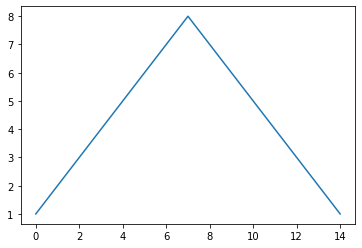

In [6]:
''' 간단한 꺾은선 그래프 '''
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([1,2,3,4,5,6,7,8,7,6,5,4,3,2,1])
plt.show()

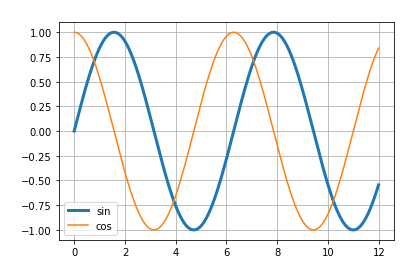

In [7]:
''' numpy를 이용해서 sin을 만들어 봅시다 '''
import numpy as np
t = np.arange(0,12,0.01)
# arrange의 오타가 아니라 range, xrange, arange처럼 아류 함수다.
plt.plot(t,np.sin(t),label = 'sin', lw = 3)
plt.plot(t,np.cos(t),label = 'cos')
plt.grid()
plt.legend(loc = 3)
plt.xlabel('time',color = 'white')
plt.ylabel('Amplitude', color = 'white')
plt.title('Example of sinewave', color = 'white')
plt.show()

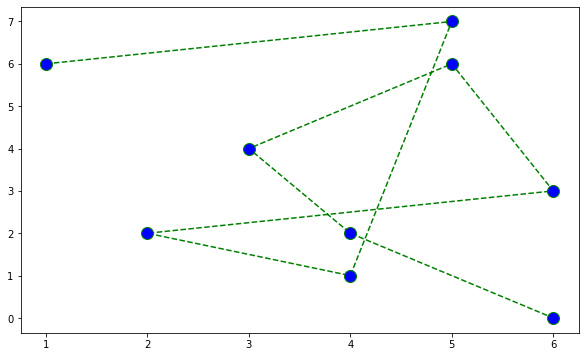

In [8]:
x = [1,5,4,2,6,5,3,4,6]
y = [6,7,1,2,3,6,4,2,0]
plt.figure(figsize = (10,6))
plt.plot(x,y,color = 'green', linestyle ='dashed', marker = 'o',
        markerfacecolor = 'blue',
         markersize = 12
        )
''' marker 옵션으로 실제로 데이터가 존재하는 점에 마킹하기 '''
plt.show()

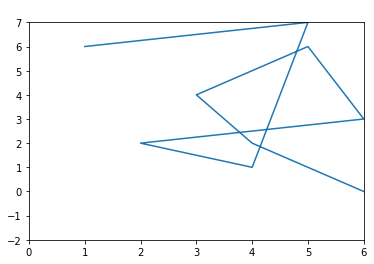

In [10]:
''' xlim과 ylim은 그림의 범위를 수동으로 지정한다.
'''
plt.title('x축, y축의 범위 설정', color = 'white')
plt.plot(x,y)
plt.xlim([0,6])
plt.ylim([-2,7])
plt.show()

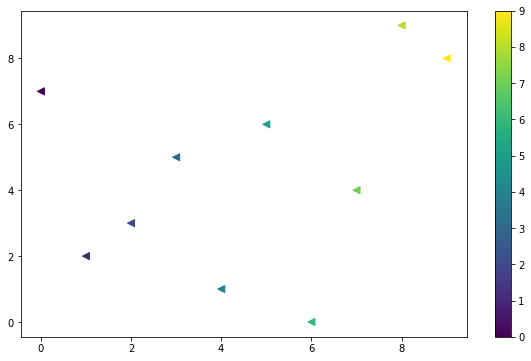

In [11]:
''' scatter 그래프. 선을 그리는 게 아니라 점을 흩뿌린다. 
colormap도 지정하자. x축의 값에 따라 색상이 바뀌므로 colormap을 x로 지정해줘야 한다.
colormap = x
'''
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([7,2,3,5,1,6,0,4,9,8])
plt.figure(figsize = (10,6))
colormap = x
plt.scatter(x,y, s= 50, c= colormap, marker = '<')
# s = 50은 마커의 크기를 말합니다.
plt.colorbar()
plt.show()

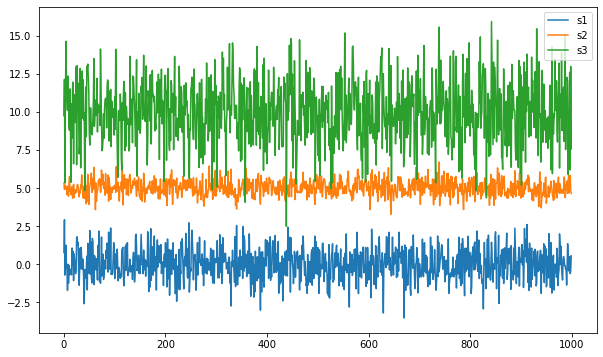

In [12]:
''' numpy 에서는 loc 옵션으로 평균값과, scale 옵션으로 표준편차를 지정합니다. '''
s1 = np.random.normal(loc=0 , scale = 1, size = 1000)
s2 = np.random.normal(loc=5 , scale = 0.5, size = 1000)
s3 = np.random.normal(loc=10 , scale = 2, size = 1000)

plt.figure(figsize = (10,6))
plt.plot(s1, label = 's1')
plt.plot(s2, label = 's2')
plt.plot(s3, label = 's3')
plt.legend(loc = 1)
plt.show()

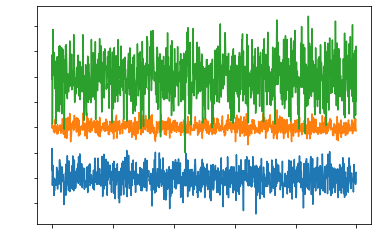

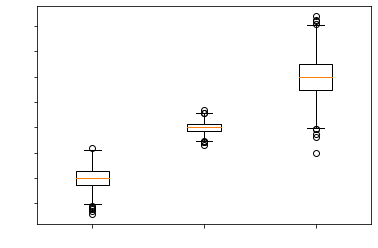

In [25]:
''' 여기에 마지막으로 tick label (축 위의 글자 ) 설정하기 '''
plt.plot(s1 , label = 's1')
plt.plot(s2 , label = 's2')
plt.plot(s3 , label = 's3')

plt.xticks(color='white')
plt.yticks(color='white')
plt.show()
''' 얘를 boxplot으로도 표현할 수 있다. 
그지같게 여기는 대괄호가 아니라 튜플이네. 왜 리스트로 안 하지?
그림 한번 그리면 바뀌면 안 되니까 그렇겠지.
'''
plt.boxplot((s1,s2,s3))
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [8]:
''' 한글 글자 안 깨지게!'''
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font',family = 'AppleGothic')
    
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
else:
    print('Unknown Operating System')
    

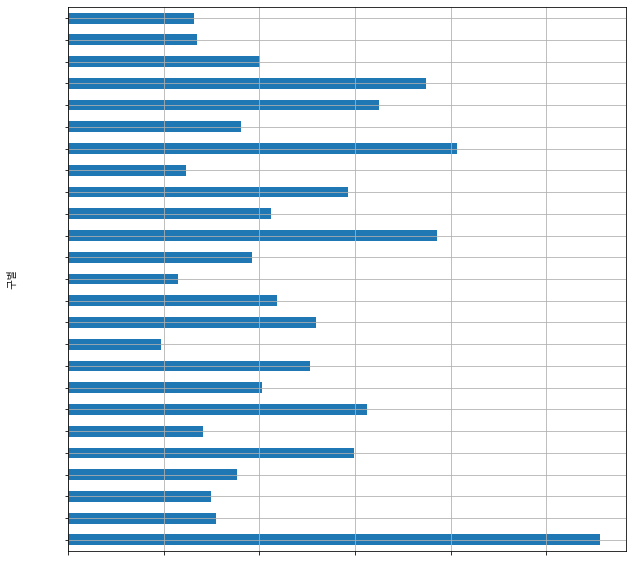

In [31]:
data_result.head()
data_result['CCTV 개수'].plot(kind='barh', grid = True, figsize = (10,10))
''' DataFrame['열']에다가 바로 plot을 해 주면 바로 그려줍니다.
왜? '구별' 열을 set_index로 index로 만들었기 때문에 알아서 기준이 된다
대신 그래프 그릴려면 여전히 plt.show()를 써 줘야 합니다.
barh(bar horizontal) 로 막대기를 수직으로 그려줍니다.
'''
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

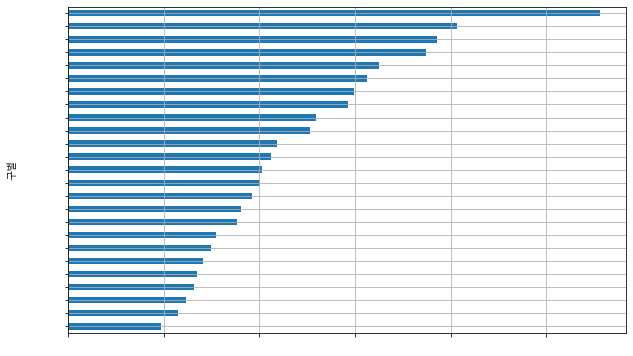

In [34]:
''' 사실 수평바 그래프는 데이터가 정렬되어 있을 때 좀 더 유용합니다. 
DataFrame['기준이 되는 열'].sort_values(). 그리고 이 뒤에는 plot()해서 그래프 정보들
'''
data_result['CCTV 개수'].sort_values().plot(kind = 'barh', grid = True, figsize = (10,6))
plt.xticks(color = 'w')
plt.yticks(color = 'w')

plt.show()

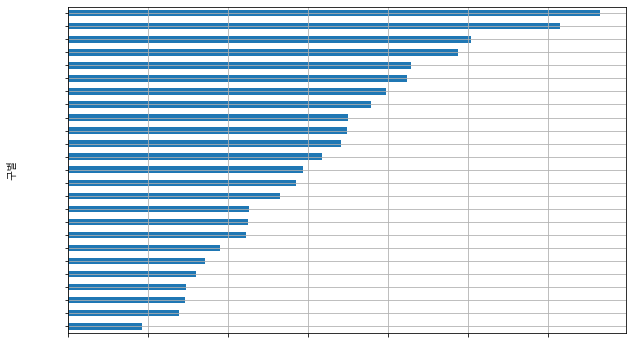

In [35]:
''' 인구 별 CCTV 보유 개수를 알아보겠습니다. '''
data_result['CCTV 비율'] = data_result['CCTV 개수'] / data_result['인구수'] * 100
data_result['CCTV 비율'].sort_values().plot(kind = 'barh', grid = True , figsize = (10, 6))
plt.xticks(color = 'w')
plt.yticks(color = 'w')
plt.show()

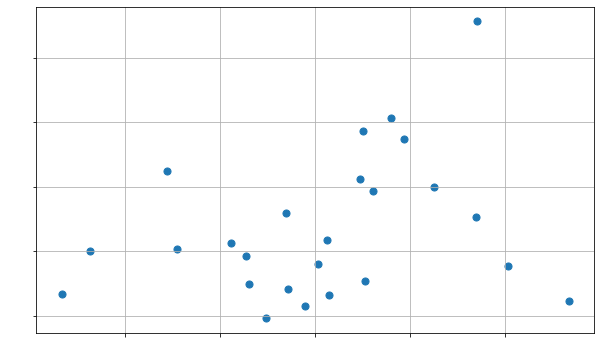

In [42]:
''' scatter 함수로 점을 찍어서 표현하면 어떨까요? 
x축은 인구수로, y축은 CCTV 개수로 '''
plt.figure( figsize = (10,6 ))
plt.scatter(data_result['인구수'],data_result['CCTV 개수'], s = 50 )

plt.grid()
plt.xticks(color = 'w')
plt.yticks(color = 'w')
plt.show()

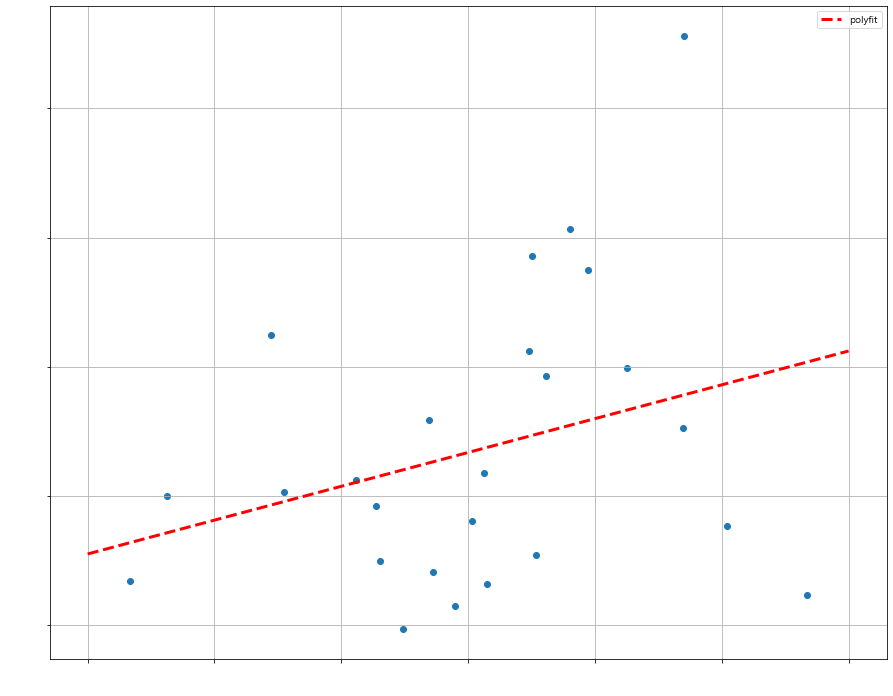

In [55]:
''' 이전 절에서 인구수와 CCTV 개수는 양의 상관관계가 있다고 나왔으니
대표하는 직선을 하나 그려봅시다 --> 파이썬을 이용한 데이터의 다항식 근사 '''
fp1 = np.polyfit(data_result['인구수'] , data_result['CCTV 개수'], 1)
# 맨 뒤에 있는 숫자는 차수입니다, 1차, 2차, 3차...
fp1

''' 결과는 계수들로 나옵니다. 여기서는 1차이니까 기울기, y절편 이겠죠? '''
f1 = np.poly1d(fp1)
fx = np.linspace(1e5,7e5,100)
''' linspace = linearly spaced, 등간격으로 나눠주는 것 '''

plt.figure( figsize = (15,12))
plt.scatter(data_result['인구수'], data_result['CCTV 개수'])
plt.plot(fx, f1(fx), lw = 3 , color = 'r', ls = 'dashed', label = 'polyfit')

plt.xlabel('인구수', color = 'w')
plt.ylabel('CCTV 개수', color = 'w')


plt.xticks(color = 'w')
plt.yticks(color = 'w')

plt.grid()
plt.legend()
plt.show()


In [10]:
''' 2개의 추가적인 장치!
이상치, 대표직선에서 멀어지는 값들은 이름이 나올 수 있도록
직선에서 멀어질 수록 색깔이 변하게 하기
'''

fp1 = np.polyfit(data_result['인구수'], data_result['CCTV 개수'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(1e5,7e5,100)

data_result['오차'] = np.abs(data_result['CCTV 개수'] - f1(data_result['인구수']) )
# 원래 값과 근사된 직선의 함수값의 차이! 

df_sort = data_result.sort_values(by = '오차', ascending = False )
df_sort.head()

df_sort.to_csv('01. CCTV_result.csv', sep = ',', encoding= 'utf-8')

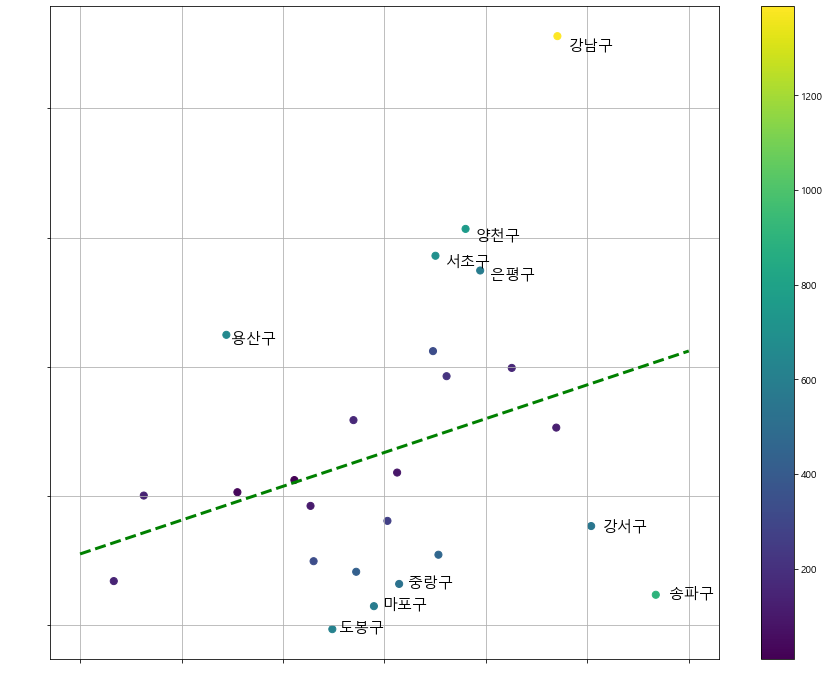

'\n직선 기준으로 위에 있는 구들은 서울시 전체 지역의 일반적인 경향보다 CCTV가 많이 설치된 곳\n직선 아래에 있는 애들은 들 설치된 곳\n'

In [62]:
''' 이제 텍스트와 color map을 입히면? '''
plt.figure (figsize = (15,12))

plt.scatter( data_result['인구수'] , data_result['CCTV 개수'],
           c = data_result['오차'] , s = 50)
plt.plot(fx,f1(fx), ls='dashed',lw=3 , color = 'g')

''' 0~9까지 위에 있는 10개 지역(오차가 제일 심한)을 text로 표시하는 for문
plt.text( x축, y축, 내가 띄우고 싶은 문자열)
'''    
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02 , df_sort['CCTV 개수'][n]*0.98,
             # x 값으로부터 1.02, y값으로부터 0.98만큼 떨어진 곳에 text를 표시
             df_sort.index[n] , fontsize = 15)
             # 인덱싱해서 문자열을 뽑는 거야. 예에에에전에 구 이름을 인덱스로 만들었잖아?
    
plt.xlabel('인구수', color = 'w')
plt.ylabel('CCTV 개수', color = 'w')
plt.xticks(color = 'w')
plt.yticks(color = 'w')

plt.colorbar()
plt.grid()
plt.show()

'''
직선 기준으로 위에 있는 구들은 서울시 전체 지역의 일반적인 경향보다 CCTV가 많이 설치된 곳
직선 아래에 있는 애들은 들 설치된 곳
'''
